# Predicting ASD in Toddlers Using Classification Models in ML

### Problem Statement:
- Autistic Spectrum Disorder (ASD) is neurodevelopment disorder which limits linguistic abilities,
communication, cognitive skills as well as social behaviors.
- As the waiting times for an ASD diagnosis are lengthy and results in significant healthcare costs
if not diagnosed early. We need to come up with an effective screening method.

### Proposed Solution:
- The problem is to identify whether a toddler will be classified as a positive case of ASD based
on the various input features.
- The given problem statement suggests us to predict categorical values.
- Therefore we can consider ASD as a typical classification problem in Machine Learning which
can be handled with classifications algorithms like Logistic regression, K-Nearest neighbors etc.

#### Source of the dataset:  https://www.kaggle.com/datasets/faizunnabi/autism-screening

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',50)

#### Review of the dataset

In [2]:
df=pd.read_csv('Toddler Autism dataset July 2018.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [4]:
#Display sample of the dataset

df.sample(8)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
497,498,1,1,1,1,1,0,1,1,1,0,32,8,m,black,no,no,family member,Yes
43,44,0,0,0,0,0,0,0,0,0,0,15,0,f,middle eastern,no,no,family member,No
223,224,1,1,1,1,1,1,1,1,1,0,21,9,m,middle eastern,yes,no,family member,Yes
831,832,1,1,1,1,1,1,1,1,1,1,35,10,m,asian,no,no,family member,Yes
382,383,0,0,0,0,0,0,0,0,0,0,36,0,m,White European,no,no,family member,No
54,55,0,0,0,0,0,0,0,0,0,1,12,1,f,black,no,no,family member,No
1025,1026,0,0,0,0,0,0,1,1,0,1,23,3,m,asian,yes,no,family member,No
293,294,1,1,0,0,0,1,1,1,1,0,31,6,f,asian,yes,no,family member,Yes


In [5]:
#Check duplicates

df.duplicated().sum()

0

In [6]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053
Case_No,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,...,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054
A1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1
A2,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,...,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1
A3,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0
A4,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,1,...,1,0,0,1,0,0,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0
A5,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,1,1,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,1,1,0,1
A6,0,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,...,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1
A7,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,0,1,...,1,0,1,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,0
A8,1,0,1,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,1,1,...,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1
A9,0,0,0,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,0,1


In [7]:
#Check missing values

pd.DataFrame({'Missing value %':df.isnull().sum()/len(df)*100})

,Missing value %
Case_No,0.0
A1,0.0
A2,0.0
A3,0.0
A4,0.0
A5,0.0
A6,0.0
A7,0.0
A8,0.0
A9,0.0


- NO missing values in the dataset

#### Unique values in the fields

In [8]:

i=1
for col in df.columns:
    print(f"{i}. Attribute name: {col}")
    print(f"Some of the unique values: {list(df[col].unique())[0:7]}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("\n")
    i+=1

1. Attribute name: Case_No
Some of the unique values: [1, 2, 3, 4, 5, 6, 7]
Number of unique values: 1054


2. Attribute name: A1
Some of the unique values: [0, 1]
Number of unique values: 2


3. Attribute name: A2
Some of the unique values: [0, 1]
Number of unique values: 2


4. Attribute name: A3
Some of the unique values: [0, 1]
Number of unique values: 2


5. Attribute name: A4
Some of the unique values: [0, 1]
Number of unique values: 2


6. Attribute name: A5
Some of the unique values: [0, 1]
Number of unique values: 2


7. Attribute name: A6
Some of the unique values: [0, 1]
Number of unique values: 2


8. Attribute name: A7
Some of the unique values: [1, 0]
Number of unique values: 2


9. Attribute name: A8
Some of the unique values: [1, 0]
Number of unique values: 2


10. Attribute name: A9
Some of the unique values: [0, 1]
Number of unique values: 2


11. Attribute name: A10
Some of the unique values: [1, 0]
Number of unique values: 2


12. Attribute name: Age_Mons
Some of th

- In the Attribute **Who completed the test** the categories 'Health Care Professional' and 'Health care professional' are the same but due to python's case sensitivity they are being shown as different unique values.

In [9]:
#Removing the above misconception

df.loc[df["Who completed the test"]\
       =="Health care professional","Who completed the test"]\
       ="Health Care Professional"

#### Dropping unecessary columns

In [10]:
df.drop(columns='Case_No',inplace=True)

#### Summary Statistics of Data

In [11]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


#### Separating the numerical and categorical features

In [12]:
df_num=df.select_dtypes(include='number')
df_num.sample(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
887,0,1,1,0,1,0,1,0,1,0,34,5
323,1,1,1,1,1,1,1,1,1,1,32,10
743,0,1,1,1,1,1,1,1,0,1,36,8
878,1,1,0,0,1,1,1,1,1,0,26,7
21,1,0,1,1,1,1,1,0,1,0,36,7


In [13]:
df_cat=df.select_dtypes(include='object')
df_cat.sample(5)

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
451,f,asian,yes,no,family member,Yes
126,f,White European,no,no,family member,No
938,m,middle eastern,no,no,family member,Yes
814,m,asian,no,no,family member,No
664,m,asian,no,no,family member,No


### ---------------------------------------------------------------------------------------------------------------------------------------------------------

# EDA

## Univariate analysis of numeric features

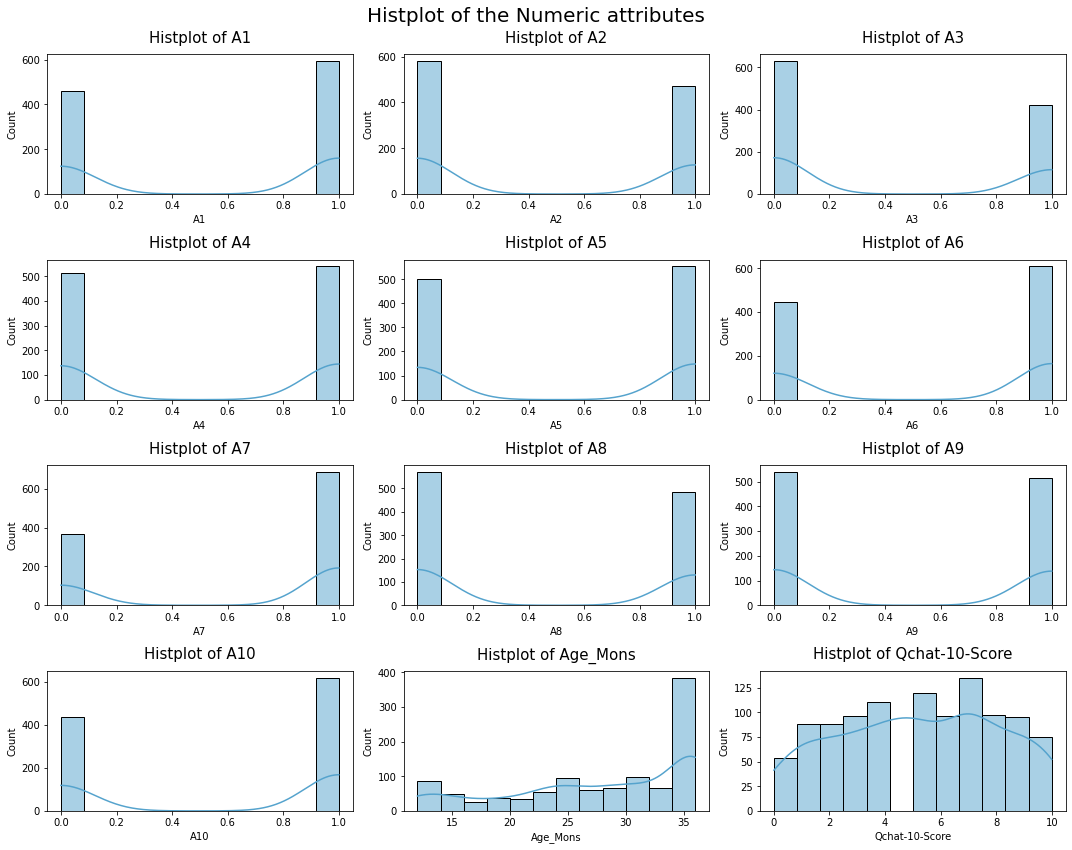

In [14]:
#Creating Histplots of the Numeric attributes

sns.set_palette("icefire")
plt.figure(figsize=(15,12))
plt.suptitle('Histplot of the Numeric attributes',fontsize=20)
i=1
for col in df_num:    
    plt.subplot(4,3,i)
    sns.histplot(data=df_num,x=col,kde=True)
    plt.title(f'Histplot of {col}',fontsize=15,pad=12)
    plt.tight_layout()
    i=i+1

#### Observations:
- Most of the toddlers which have been examined are 36 months old
- In the given dataset,  on an average the Qchat score of a toddler is between 3-7.

NOTE: Qchat score is between 1-10 (Less that or equal 3: No ASD traits; Greater than 3 ASD traits)

In [15]:
# Check skewness of the numeric attributes

pd.DataFrame(df_num.skew(),columns=['Skewness'])\
.reset_index().rename(columns={'index':'Attributes'})

,Attributes,Skewness
0,A1,-0.256715
1,A2,0.206312
2,A3,0.403178
3,A4,-0.049421
4,A5,-0.098933
5,A6,-0.311541
6,A7,-0.629430
7,A8,0.163967
8,A9,0.041814
9,A10,-0.351118


- Except Age_Mons all other attributes have a gaussian like distribution

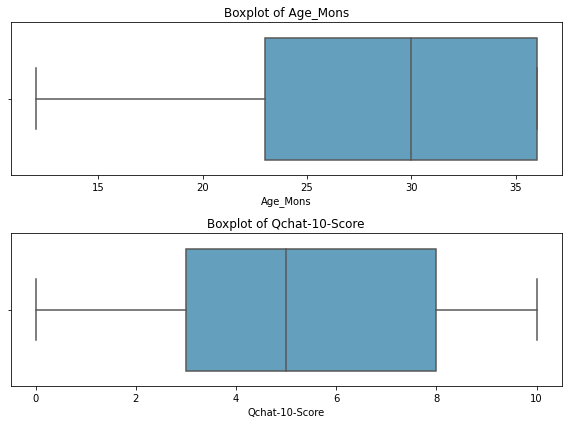

In [16]:
# Chek outliers in Age and Qchat variables

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title('Boxplot of Age_Mons')
sns.boxplot(data=df_num,x='Age_Mons')


plt.subplot(2,1,2)
plt.title('Boxplot of Qchat-10-Score')
sns.boxplot(data=df_num,x='Qchat-10-Score')

plt.tight_layout()
plt.show()

- No ouliers present in the numeric attributes

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

## Univariate analysis of categorical features

In [17]:
#Proportion of different categories in the attribute

for col in df_cat.columns:
    print(f"Attribute name: {col}\n")
    print(f"{df_cat[col].value_counts()/len(df)*100}")
    print("\n")


Attribute name: Sex

m    69.734345
f    30.265655
Name: Sex, dtype: float64


Attribute name: Ethnicity

White European    31.688805
asian             28.368121
middle eastern    17.836812
south asian        5.692600
black              5.028463
Hispanic           3.795066
Others             3.320683
Latino             2.466793
mixed              0.759013
Pacifica           0.759013
Native Indian      0.284630
Name: Ethnicity, dtype: float64


Attribute name: Jaundice

no     72.675522
yes    27.324478
Name: Jaundice, dtype: float64


Attribute name: Family_mem_with_ASD

no     83.870968
yes    16.129032
Name: Family_mem_with_ASD, dtype: float64


Attribute name: Who completed the test

family member               96.584440
Health Care Professional     2.751423
Self                         0.379507
Others                       0.284630
Name: Who completed the test, dtype: float64


Attribute name: Class/ASD Traits 

Yes    69.070209
No     30.929791
Name: Class/ASD Traits , dtype: floa

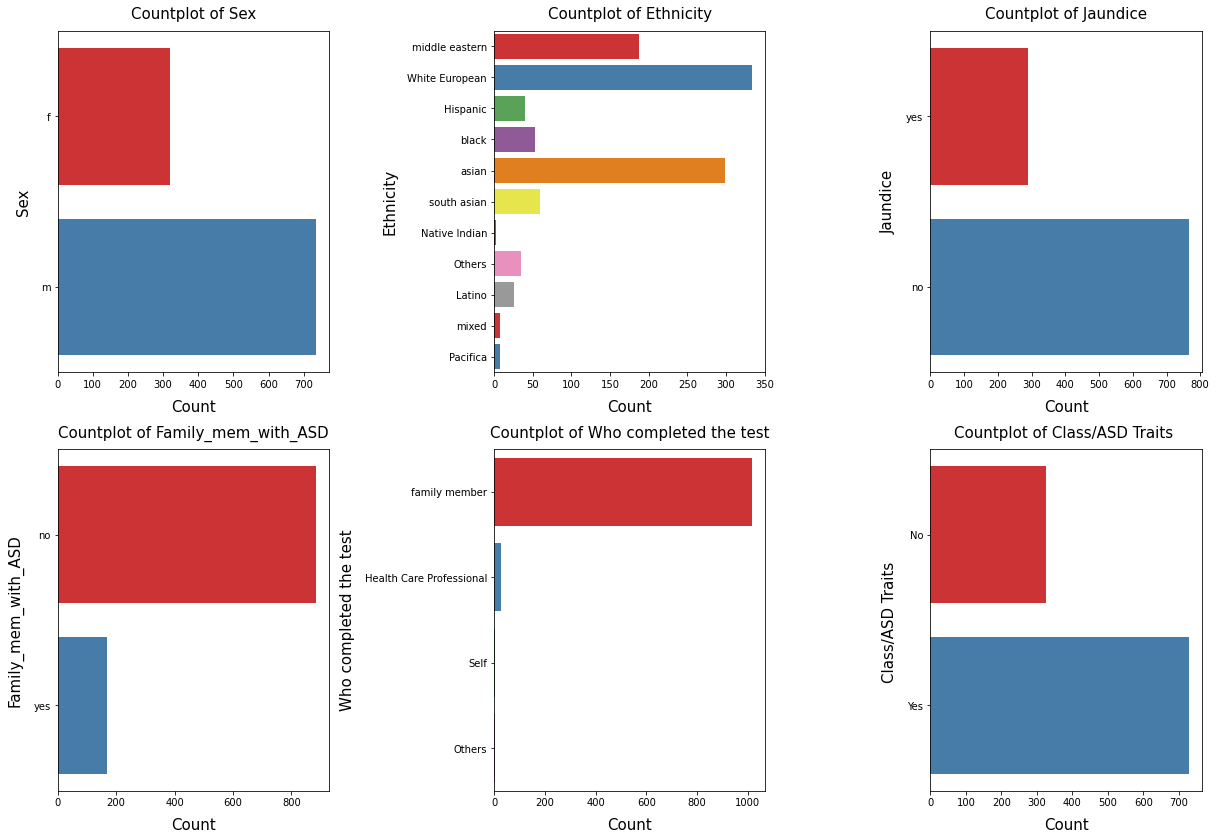

In [18]:
#Creating countplot for all the categorical features

plt.figure(figsize=(17,17))
i=1
for col in df_cat.columns:
    
    plt.subplot(3,3,i)
    sns.countplot(data=df_cat,y=col,palette='Set1')
    plt.title(f"Countplot of {col}",fontsize=15,pad=12)
    plt.xlabel('Count',fontsize=15,labelpad=10)
    plt.ylabel(col,fontsize=15,labelpad=10,rotation=90)
    plt.tight_layout()
    #plt.show()
    i+=1

#### Observations:
- Male toddlers make about 70% of the ASD dataset
- There are more number toddlers from white european, middle eastern, asian ethnicities with white europeans being the largest.
- A large number of toddlers examined did not have jaundice and did not have a family history of ASD.
- About 96% of the tests were completed by family members.
- Target variable seems imbalance as the 70% of the cases resulted in ASD and 30% did not.

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

## Multivariate Analysis
Analysis of the target variable **Class/ASD Traits** with other relevant input features

Numeric attributes = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score']

Categorical attributes = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '

### Heatmap to view correlation of all the features w.r.t each other

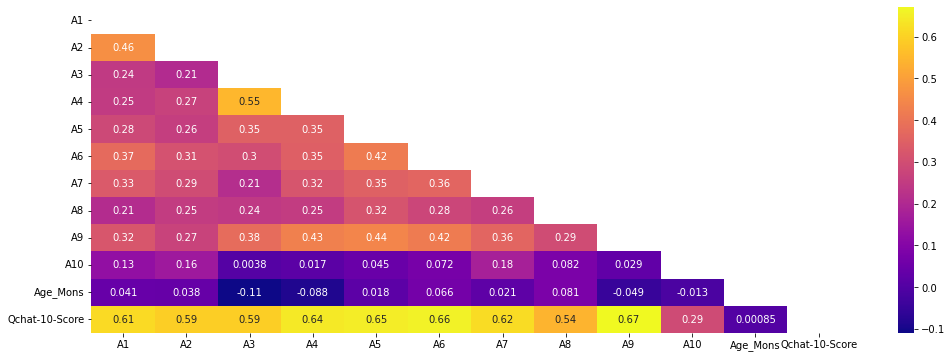

In [19]:
plt.figure(figsize=(17,6))
sns.heatmap(data=df.corr(),annot=True,\
            mask=np.triu\
            (np.ones_like(df.corr(),bool)),cmap='plasma')
plt.xticks(rotation=360)
plt.show()

#### Observations
- As Qchat score is decided on the basis of the answers in A(1-10), the correlation between these variables is obvious.

- Some answers do have correlation, therefore to avoid multicollinearity it would be better to ignore the features contributing to Qchat score while building the model

### At what age do the toddlers mostly show ASD symptoms?

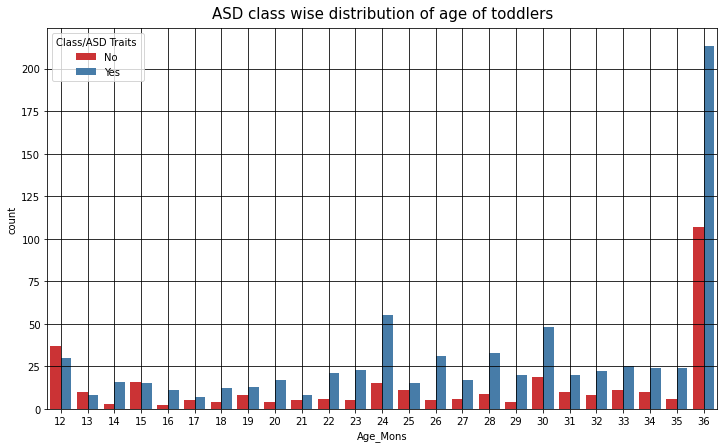

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='Age_Mons',hue='Class/ASD Traits ',palette='Set1')
plt.title('ASD class wise distribution of age of toddlers',fontsize=15,pad=10)
plt.grid(c='k')
plt.show()

#### Observations
- ASD positive cases are mostly recognised in the toddlers of age 36 months.
- According to National Institute of health, many children show symptoms of autism by 12 months to 18 months of age or earlier.
 

### Q-CHAT score distribution against the ASD traits

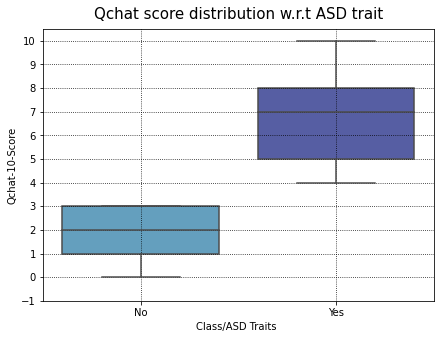

In [21]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='Class/ASD Traits ',y='Qchat-10-Score')
plt.title("Qchat score distribution w.r.t ASD trait",fontsize=15,pad=10)
plt.yticks(np.arange(-1, 11, 1))
plt.grid(c='k',ls=':')
plt.show()

#### Observations
- The dataset contains more number of toddler with ASD having higher Qchat score.
- The threshold for deciding positive ASD on the basis Qchat score can also be acknowledged as:
  - Qchat score <= 3 : Negative case of ASD
  - Qchat score > 3 : Positive case of ASD

### Which gender mostly shows autistic symptoms? 

In [22]:
df1=pd.crosstab(df['Sex'],df['Class/ASD Traits '],\
                rownames=['Sex'],colnames=['Class/ASD Traits '])
df1

Class/ASD Traits,No,Yes
Sex,,
f,125,194
m,201,534


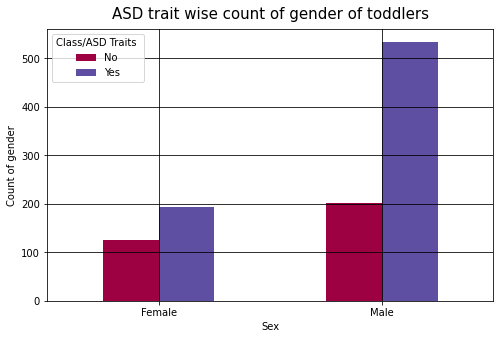

In [23]:
df1.plot(kind='bar',colormap='Spectral',figsize=(8,5))
plt.title('ASD trait wise count of gender of toddlers',fontsize=15,pad=10)
plt.ylabel('Count of gender')
plt.xticks(ticks=[0,1],labels=['Female','Male'],rotation=0)
plt.grid(c='k')
plt.show()

#### Observations:
- The observation for this case is consistent with the research that males are mostly diagnosed with ASD.

### Count of ASD traits based on the toddler' s ethnicity

In [24]:
df2=pd.crosstab(df['Ethnicity'],df['Class/ASD Traits '],\
                rownames=['Ethnicity'],colnames=['Class/ASD Traits '])
df2

Class/ASD Traits,No,Yes
Ethnicity,,
Hispanic,10,30
Latino,6,20
Native Indian,0,3
Others,6,29
Pacifica,1,7
White European,84,250
asian,87,212
black,14,39
middle eastern,92,96


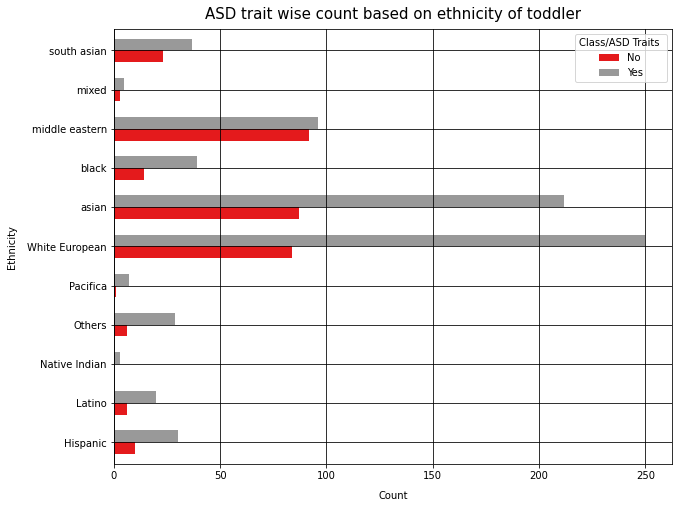

In [25]:
df2.plot(kind='barh',colormap='Set1',figsize=(10,8),width=0.6)
plt.title('ASD trait wise count based on ethnicity of toddler',fontsize=15,pad=10)
plt.xlabel('Count',labelpad=10)
plt.ylabel('Ethnicity',labelpad=10)
plt.grid(c='k')
plt.show()

#### Observations:
- ASD positive cases are mostly observed from the western european region followed by asian then middle eastern.

### Effect of Jaundice on ASD traits

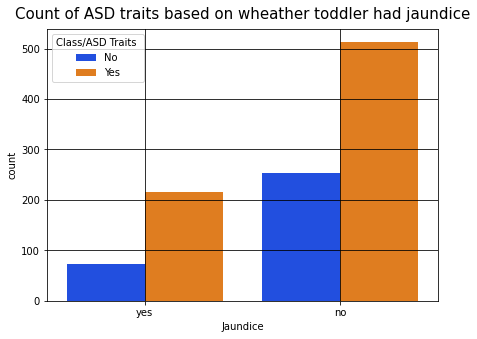

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Jaundice',hue='Class/ASD Traits ',palette='bright')
plt.title('Count of ASD traits based on wheather toddler had jaundice',fontsize=15,pad=10)
plt.grid(c='k')
plt.show()

#### Obseravtions
- Toddler's having jaundice consits of more postive ASD cases than negative ASD cases.
- Of all the cases a large number of positive ASD cases are observed in toddler' s which did not have jaundice

### Family history and ASD

In [27]:
df3=pd.crosstab(df['Family_mem_with_ASD'],df['Class/ASD Traits '],\
                rownames=['Family_mem_with_ASD'],colnames=['Class/ASD Traits '])
df3

Class/ASD Traits,No,Yes
Family_mem_with_ASD,,
no,271,613
yes,55,115


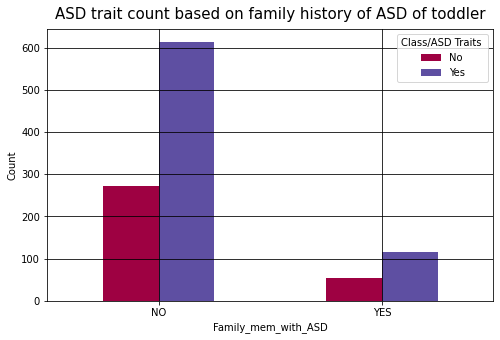

In [28]:
df3.plot(kind='bar',colormap='Spectral',figsize=(8,5))
plt.title('ASD trait count based on family history of ASD of toddler',fontsize=15,pad=10)
plt.ylabel('Count')
plt.xticks(ticks=[0,1],labels=['NO','YES'],rotation=0)
plt.grid(c='k')
plt.show()

### ---------------------------------------------------------------------------------------------------------------------------------------------------------


## Data Preprocessing
1. Handling Missing values
2. Outlier treatment
3. Converting categorical features to numeric
4. Scaling if needed
5. Transformation if needed

### 1. Handling Missing values
   - As observed during EDA the dataset consists on NO missing values. 

### 2. Outlier treatment
   - As observed during EDA the numeric attributes showing distributions of Age and Q-CHAT score do not have any outliers.

In [29]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


### 3. Encoding categorical variables. 

In [30]:
#Sample of the categorical attributes
df_cat.sample(5)

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
44,f,middle eastern,no,no,family member,No
506,m,asian,no,no,family member,Yes
910,f,Latino,no,no,family member,Yes
214,m,Hispanic,no,no,family member,Yes
838,m,middle eastern,no,no,family member,No


**NOTE**
1. Attributes **Sex, Who completed the test, Class/ASD Traits** consist of nominal categories. Such categories can be encoded using one hot encoding
2. Attributes **Jaundice, Family_mem_with_ASD** should be given weights for deciding the target variable as per previous research. For this we must prefer label encoding.
3. **Ethnicity** has 11 different categories, hence OHE will increase no. of dimensions. To avoid this we will label encode the same.

In [31]:
#Encoding Nominal Attributes using get_dummies

df=pd.get_dummies(data=df,columns=\
                  ['Sex', 'Who completed the test', 'Class/ASD Traits '],drop_first=True)
df.sample(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Ethnicity,Jaundice,Family_mem_with_ASD,Sex_m,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits _Yes
135,0,0,0,0,1,0,0,0,0,0,34,1,south asian,yes,no,0,0,0,1,0
480,1,1,1,1,1,1,1,1,1,0,36,9,south asian,yes,no,0,0,0,1,1
974,1,0,0,0,0,0,1,1,1,1,36,5,White European,no,yes,1,0,0,1,1
25,0,0,0,0,0,0,0,0,0,0,24,0,middle eastern,no,no,0,0,0,1,0
63,0,0,1,1,1,1,1,0,0,0,30,5,White European,no,no,1,0,0,1,1


In [32]:
#Label encoding Ethnicity
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Ethnicity_LE']=LE.fit_transform(df['Ethnicity'])

In [33]:
#Frequncy Encoding of remainig attibutes
df['Jaundice_FE']=df['Jaundice'].map(df['Jaundice'].value_counts().to_dict())
df['Family_mem_with_ASD_FE']=df['Family_mem_with_ASD'].\
map(df['Family_mem_with_ASD'].value_counts().to_dict())

In [34]:
df.sample(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Ethnicity,Jaundice,Family_mem_with_ASD,Sex_m,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits _Yes,Ethnicity_LE,Jaundice_FE,Family_mem_with_ASD_FE
570,1,0,0,0,0,0,0,0,0,1,36,2,Hispanic,no,no,1,0,0,1,0,0,766,884
498,1,0,0,1,1,1,0,0,0,1,29,5,White European,yes,no,1,0,0,1,1,5,288,884
667,1,1,1,1,1,0,1,1,0,0,24,7,Others,no,no,1,0,0,1,1,3,766,884
649,0,0,1,1,0,0,0,1,0,1,24,4,asian,no,no,1,0,0,1,1,6,766,884
515,1,0,1,0,0,0,0,0,0,0,36,2,asian,no,yes,1,0,0,1,0,6,766,170


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   A1                                    1054 non-null   int64 
 1   A2                                    1054 non-null   int64 
 2   A3                                    1054 non-null   int64 
 3   A4                                    1054 non-null   int64 
 4   A5                                    1054 non-null   int64 
 5   A6                                    1054 non-null   int64 
 6   A7                                    1054 non-null   int64 
 7   A8                                    1054 non-null   int64 
 8   A9                                    1054 non-null   int64 
 9   A10                                   1054 non-null   int64 
 10  Age_Mons                              1054 non-null   int64 
 11  Qchat-10-Score                

### Selecting the relevant features for ML model


In [36]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Sex_m', 'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member', 'Class/ASD Traits _Yes',
       'Ethnicity_LE', 'Jaundice_FE', 'Family_mem_with_ASD_FE'],
      dtype='object')

#### Heatmap to view correlations between various attributes in the modified dataframe

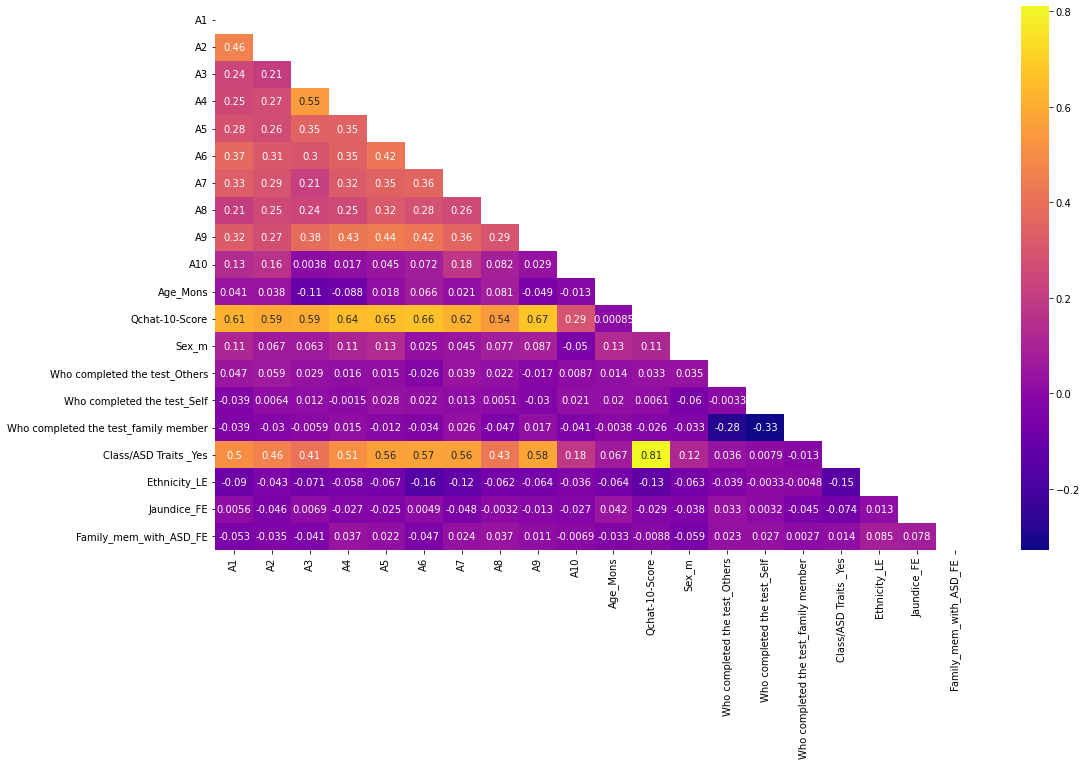

In [37]:
plt.figure(figsize=(17,10))
sns.heatmap(data=df.corr(),annot=True,\
            mask=np.triu\
            (np.ones_like(df.corr(),bool)),cmap='plasma')
plt.show()

#### To select the relevant features for the classification model, we must drop:
1. features giving rise to multicollinearity, which are:
    - ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Qchat-10-Score']
2. features of the categorical type, which are:
    - ['Ethnicity', 'Jaundice', 'Family_mem_with_ASD',]

In [38]:
new_df=df.drop(columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',\
                        'Qchat-10-Score','Ethnicity', 'Jaundice', 'Family_mem_with_ASD'],axis=1)

In [39]:
new_df.sample(5)

,Age_Mons,Sex_m,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits _Yes,Ethnicity_LE,Jaundice_FE,Family_mem_with_ASD_FE
562,36,1,0,0,1,1,6,766,884
368,36,0,0,0,1,1,6,288,884
715,15,1,0,0,1,0,6,766,884
648,24,1,0,0,1,0,6,766,884
447,12,1,0,0,1,1,4,766,884


In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age_Mons                              1054 non-null   int64
 1   Sex_m                                 1054 non-null   uint8
 2   Who completed the test_Others         1054 non-null   uint8
 3   Who completed the test_Self           1054 non-null   uint8
 4   Who completed the test_family member  1054 non-null   uint8
 5   Class/ASD Traits _Yes                 1054 non-null   uint8
 6   Ethnicity_LE                          1054 non-null   int32
 7   Jaundice_FE                           1054 non-null   int64
 8   Family_mem_with_ASD_FE                1054 non-null   int64
dtypes: int32(1), int64(3), uint8(5)
memory usage: 34.1 KB


In [41]:
new_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053
Age_Mons,28,36,36,24,20,21,33,33,36,22,36,17,25,15,18,12,36,12,29,12,36,36,36,36,22,...,36,36,36,32,16,28,18,14,12,26,26,25,25,30,25,25,30,24,30,30,24,12,18,19,24
Sex_m,0,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,...,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1
Who completed the test_Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Who completed the test_Self,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Who completed the test_family member,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Class/ASD Traits _Yes,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,...,1,0,1,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1
Ethnicity_LE,8,5,8,0,5,7,6,6,6,10,0,8,8,8,8,7,8,8,8,7,8,8,2,8,5,...,5,10,3,5,10,5,3,6,5,6,6,5,5,0,6,6,8,8,5,5,5,7,8,5,6
Jaundice_FE,288,288,288,766,766,766,288,288,766,766,288,288,288,288,766,766,766,288,766,766,766,766,288,288,766,...,766,288,766,288,288,766,288,766,766,766,766,766,288,288,766,766,766,766,766,766,766,288,288,766,288
Family_mem_with_ASD_FE,884,884,884,884,170,884,884,884,884,884,170,884,884,884,884,884,170,884,884,884,884,884,170,170,884,...,170,884,170,884,170,884,884,884,884,170,170,884,884,884,170,170,884,884,884,884,170,884,884,170,170


## Applying Classification algorithms
1. Logistic Regression
2. KNN Classifier
3. Decision Tree Classification
4. Random Forest Classification

## 1. Logistic Regression

In [42]:
# Convert all data type to int

new_df=new_df.astype(int)

In [43]:
# Separate the dependent and independent variables

x=new_df.drop('Class/ASD Traits _Yes',axis=1).values
y=new_df['Class/ASD Traits _Yes'].values

#Train_test_split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [44]:
#Display shapes of the train_test_split

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((843, 8), (211, 8), (843,), (211,))

#### Scaling the data

In [45]:
#Normalizing the data

from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
x_train=MMS.fit_transform(x_train)
x_test=MMS.fit_transform(x_test)

#### Importing and fitting the model over trainig data

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [47]:
log_reg.fit(x_train,y_train)

LogisticRegression()

#### Comparing outcomes of the test set with logistic regression model's result 

In [48]:
pd.DataFrame({'ASD Trait (Actual)':y_test,\
              'ASD Trait (Predicted)':log_reg.predict(x_test)}).sample(8)

,ASD Trait (Actual),ASD Trait (Predicted)
41,1,1
77,1,1
183,1,1
198,1,1
184,1,1
34,1,1
72,1,1
102,0,1


#### Evaluating performance of the model

In [49]:
from sklearn.metrics \
import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
print(f"Following are the evaluation metrics of the classification problem\n\n\
1. Accuracy score: {accuracy_score(y_test,log_reg.predict(x_test))}\n\
2. F1-score: {f1_score(y_test,log_reg.predict(x_test))}\n\
3. Recall score: {recall_score(y_test,log_reg.predict(x_test))}\n\
4. Precision score: {precision_score(y_test,log_reg.predict(x_test))}\n\
5. Confusion matrix: \n{confusion_matrix(y_test,log_reg.predict(x_test))}")

Following are the evaluation metrics of the classification problem

1. Accuracy score: 0.7345971563981043
2. F1-score: 0.8390804597701149
3. Recall score: 0.954248366013072
4. Precision score: 0.7487179487179487
5. Confusion matrix: 
[[  9  49]
 [  7 146]]


In [50]:
from sklearn.metrics import classification_report
print("\033[1mClassification report for the Logistic Regression model:\033[0m\n")
print(classification_report(y_test, log_reg.predict(x_test)))

Classification report for the Logistic Regression model:

              precision    recall  f1-score   support

           0       0.56      0.16      0.24        58
           1       0.75      0.95      0.84       153

    accuracy                           0.73       211
   macro avg       0.66      0.55      0.54       211
weighted avg       0.70      0.73      0.68       211



### Observation based on Logistic regression classifier:
1. Using logistic regression algorithm the model has 
achieved an accuracy of about 73%.
2. 74.87% of positive predictions made by the 
model are actually correct.
3. 95.42% of actual positive values were correctly 
classified by the model.
4. Though the type-II error is small (7 instances), a 
considerable amount of false positive instances 
are observed.


### --------------------------------------------- Logistic Regression END --------------------------------------------


## 2. KNN Classifier

In [51]:
#Importing the KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(weights='distance')

In [52]:
#Fit the training data for KNN Classifier

knn.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [53]:
#Predict the test dataset based on KNN Classifier

pd.DataFrame({'ASD Trait (Actual)':y_test,\
              'ASD Trait (Predicted)':knn.predict(x_test)}).sample(8)

,ASD Trait (Actual),ASD Trait (Predicted)
195,0,0
164,1,1
122,1,1
69,0,1
163,1,1
129,1,0
96,1,1
120,1,1


In [54]:
#Evaluation metrics for KNN Classifier

from sklearn.metrics \
import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
print(f"Following are the evaluation metrics of the classification problem\n\n\
1. Accuracy score: {accuracy_score(y_test,knn.predict(x_test))}\n\
2. F1-score: {f1_score(y_test,knn.predict(x_test))}\n\
3. Recall score: {recall_score(y_test,knn.predict(x_test))}\n\
4. Precision score: {precision_score(y_test,knn.predict(x_test))}\n\
5. Confusion matrix: \n{confusion_matrix(y_test,knn.predict(x_test))}")

Following are the evaluation metrics of the classification problem

1. Accuracy score: 0.6824644549763034
2. F1-score: 0.7831715210355986
3. Recall score: 0.7908496732026143
4. Precision score: 0.7756410256410257
5. Confusion matrix: 
[[ 23  35]
 [ 32 121]]


In [55]:
#Classification report of KNN Classifier

from sklearn.metrics import classification_report
print("\033[1mClassification report for the KNN Classifier:\033[0m\n")
print(classification_report(y_test, knn.predict(x_test)))

Classification report for the KNN Classifier:

              precision    recall  f1-score   support

           0       0.42      0.40      0.41        58
           1       0.78      0.79      0.78       153

    accuracy                           0.68       211
   macro avg       0.60      0.59      0.60       211
weighted avg       0.68      0.68      0.68       211



### Observation based on KNN Classifier:
1. An accuracy score of 68.25% is observed.
2. KNN correctly guessed about 77.56% of the 
total positive predictions.
3. Recall being 79.08% indicates that KNN 
correctly classified the actual positive cases.

### --------------------------------------------- KNN Classifier END --------------------------------------------

## 3. Decision tree Classifier

In [56]:
#Importing Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [57]:
#Fitting DT over trainig data

DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
#Comparing test set and model's result  

pd.DataFrame({'ASD Trait (Actual)':y_test,\
              'ASD Trait (Predicted)':DT.predict(x_test)}).sample(8)

,ASD Trait (Actual),ASD Trait (Predicted)
141,1,1
32,0,1
125,1,1
193,1,1
52,1,0
19,1,1
86,1,0
123,0,1


In [59]:
#Evaluation metrics for DecisionTree Classifier

from sklearn.metrics \
import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
print(f"Following are the evaluation metrics of the classification problem\n\n\
1. Accuracy score: {accuracy_score(y_test,DT.predict(x_test))}\n\
2. F1-score: {f1_score(y_test,DT.predict(x_test))}\n\
3. Recall score: {recall_score(y_test,DT.predict(x_test))}\n\
4. Precision score: {precision_score(y_test,DT.predict(x_test))}\n\
5. Confusion matrix: \n{confusion_matrix(y_test,DT.predict(x_test))}")

Following are the evaluation metrics of the classification problem

1. Accuracy score: 0.6492890995260664
2. F1-score: 0.7549668874172185
3. Recall score: 0.7450980392156863
4. Precision score: 0.7651006711409396
5. Confusion matrix: 
[[ 23  35]
 [ 39 114]]


In [60]:
#Classification report of DecisionTree Classifier

from sklearn.metrics import classification_report
print("\033[1mClassification report for the DT Classifier:\033[0m\n")
print(classification_report(y_test, DT.predict(x_test)))

Classification report for the DT Classifier:

              precision    recall  f1-score   support

           0       0.37      0.40      0.38        58
           1       0.77      0.75      0.75       153

    accuracy                           0.65       211
   macro avg       0.57      0.57      0.57       211
weighted avg       0.66      0.65      0.65       211



### Observations based on Decision Tree Classifier:
- Recall and precision of the Decision tree classifier 
are about 75.16% and 76.66% respectively.
- A significant amount of type-I and type-II errors are 
observed.


### --------------------------------------------- Decision Tree Classifier END --------------------------------------------


## 4.Random Forest Classifier

In [61]:
#Importing Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

In [62]:
#Fitting RF Classifier over training data

RF.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
#Comparing test set and model's result  

pd.DataFrame({'ASD Trait (Actual)':y_test,\
              'ASD Trait (Predicted)':RF.predict(x_test)}).sample(8)

,ASD Trait (Actual),ASD Trait (Predicted)
200,0,1
55,1,1
5,0,1
84,1,1
4,1,1
180,0,1
101,1,1
202,1,1


In [64]:
#Evaluation metrics for RandomForest Classifier

from sklearn.metrics \
import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
print(f"Following are the evaluation metrics of the classification problem\n\n\
1. Accuracy score: {accuracy_score(y_test,RF.predict(x_test))}\n\
2. F1-score: {f1_score(y_test,RF.predict(x_test))}\n\
3. Recall score: {recall_score(y_test,RF.predict(x_test))}\n\
4. Precision score: {precision_score(y_test,RF.predict(x_test))}\n\
5. Confusion matrix: \n{confusion_matrix(y_test,RF.predict(x_test))}")

Following are the evaluation metrics of the classification problem

1. Accuracy score: 0.6872037914691943
2. F1-score: 0.7911392405063291
3. Recall score: 0.8169934640522876
4. Precision score: 0.7668711656441718
5. Confusion matrix: 
[[ 20  38]
 [ 28 125]]


In [65]:
#Classification report of RandomForest Classifier

from sklearn.metrics import classification_report
print("\033[1mClassification report for the Random Forest Classifier:\033[0m\n")
print(classification_report(y_test, RF.predict(x_test)))

Classification report for the Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.42      0.34      0.38        58
           1       0.77      0.82      0.79       153

    accuracy                           0.69       211
   macro avg       0.59      0.58      0.58       211
weighted avg       0.67      0.69      0.68       211



### Observations based on Random Forest Classifier:
1. Recall and precision of the Decision tree classifier 
are about 81.1% and 77.5% respectively.
2. Similar to KNN and Decision trees, a significant 
amount type-I and type-II errors are observed.

### --------------------------------------------- Random Forest Classifier END --------------------------------------------

## Optimization

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
from sklearn.model_selection import GridSearchCV

#Creating dictionary of hyperparameter values
param_grid={'penalty':['l1', 'l2', 'elasticnet'],\
            'C':np.logspace(-5, 8, 15),\
            'class_weight':['balanced',None],\
            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [68]:
logreg_gs=GridSearchCV(log_reg,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [69]:
logreg_gs.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [70]:
print(f"Tuned parameters:{logreg_gs.best_params_}")

Tuned parameters:{'C': 0.4393970560760795, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}


### Implementing Logistic regression with best_params_

In [71]:
new_lr=LogisticRegression(C=0.4393970560760795,\
                          class_weight=None,penalty='l2',solver='liblinear')

In [72]:
new_lr.fit(x_train,y_train)

LogisticRegression(C=0.4393970560760795, solver='liblinear')

In [73]:
print(classification_report(y_test, new_lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.50      0.12      0.19        58
           1       0.74      0.95      0.83       153

    accuracy                           0.73       211
   macro avg       0.62      0.54      0.51       211
weighted avg       0.67      0.73      0.66       211



#### Evaluation metrics after optimization 

In [74]:
print(f"Following are the evaluation metrics of the classification problem\n\n\
1. Accuracy score: {accuracy_score(y_test,new_lr.predict(x_test))}\n\
2. F1-score: {f1_score(y_test,new_lr.predict(x_test))}\n\
3. Recall score: {recall_score(y_test,new_lr.predict(x_test))}\n\
4. Precision score: {precision_score(y_test,new_lr.predict(x_test))}\n\
5. Confusion matrix: \n{confusion_matrix(y_test,new_lr.predict(x_test))}")

Following are the evaluation metrics of the classification problem

1. Accuracy score: 0.7251184834123223
2. F1-score: 0.8342857142857144
3. Recall score: 0.954248366013072
4. Precision score: 0.7411167512690355
5. Confusion matrix: 
[[  7  51]
 [  7 146]]


## END